## The Lending Club case study

### Business Objective:

A consumer finance company wants to identify risky loan applicants based on historical data of applicants. 
The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment & then such loans can be reduced thereby cutting down the amount of credit loss. 

Identification of such applicants/indicators of default using EDA is the aim of this case study.

### Problem statement :

Indentify Variables/Factors that affect loan default 

### Import necessary packages 

In [1]:
#for data and numeric analysis
import pandas as pd
import numpy as np

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for unnecessary warnings
import warnings
warnings.filterwarnings('ignore') 

#setting display options
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

### STEP 1:  Understanding the data

We will begin the process of EDA by answering some of the questions like: 
1. What is the shape of the data (number of rows & columns)
2. Are there any summary/header/footer rows?
3. Presence of null values in rows/columns?
4. What kind of data is available,from a business perspective?

In [2]:
#read the data from csv file
loan_df = pd.read_csv("loan.csv")
loan_df.head(2)

# There are no header rows in the data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
loan_df.tail(2)
#there are no summary or footer rows present as well

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,Evergreen Center,< 1 year,OWN,22000.0,Not Verified,Jun-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,"I plan to consolidate over $7,000 of debt: a c...",debt_consolidation,Consolidation Loan,027xx,MA,14.29,1,Oct-03,0,11.0,0.0,7,0,4175,51.50%,8,f,0.0,0.0,9195.263334,980.83,7500.0,1695.26,0.0,0.0,0.0,Jun-10,256.59,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#shape of data (total rows & columns)
loan_df.shape

(39717, 111)

In [5]:
#metadata of the dataframe
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
#checking for columns with high % of nulls
round(100*loan_df.isna().mean(),2).sort_values(ascending=False)

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64

#### We see there are columns where ALL values are null. We will need to remove such columns going further.


After going through the data_dictionary excel ,we can assume the following :
#### There are mainly 3 types of data present in the dataset
1. consumer demographics: such as annual_inc, home_ownership, emp_length 
2. loan attributes: such as int_rate, loan_amt,term etc
3. Data/columns which are calculated only after loan is approved:total_payment, revol_bal etc 

We will omit the 3rd type of data since they will have no relevance to our analysis.

### STEP 2:  Data cleaning and Manipulation

We will address various data quality issues by:

1. Indentifying and imputing missing values
2. Removing data redundancies
3. Filtering/assumptions on data based on business knowledge
4. Standardising Values (fixing datatypes,date & string manipulation,binning etc)
5. Outlier treatment
6. Creating some derived metrics

### 1.  Missing value treatment

#### PART1: 
We saw above that there are columns where ALL values are null.So We will drop these columns as they wont contribute to EDA

In [3]:
loan_df= loan_df.dropna(how="all",axis=1)
loan_df.shape

(39717, 57)

In [5]:
#checking the null percentage again
round(100*loan_df.isna().mean(),2).sort_values(ascending=False)

next_pymnt_d                  97.13
mths_since_last_record        92.99
mths_since_last_delinq        64.66
desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
chargeoff_within_12_mths       0.14
collections_12_mths_ex_med     0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
home_ownership                 0.00
int_rate                       0.00
out_prncp_inv                  0.00
total_pymnt                    0.00
total_pymnt_inv                0.00
total_rec_prncp                0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
collection_recovery_fee        0.00
term                           0.00
last_pymnt_amnt                0.00
initial_list_status            0.00
funded_amnt_inv             

##### PART2 
We will also drop columns where more than 50% of the values are null
1. next_pymnt_d -> 97.13%
2. mths_since_last_record ->92.99%
3. mths_since_last_delinq ->64.66%

In [4]:
loan_df= loan_df.drop(["next_pymnt_d","mths_since_last_record","mths_since_last_delinq"],axis=1)
loan_df.shape

(39717, 54)

#### NOTE : After removing columns with high percentage of null values,we are left with 50% lesser columns

#### 2. Removing data redundancies

In [7]:
#1.Removing duplicate rows in the dataframe
loan_df = loan_df.drop_duplicates()
loan_df.shape
#No duplicate rows were found in the dataframe

(39717, 54)

#### Analysing the uniqueness of data in each column to filter out our data further

We will remove columns that have a single data in all rows and where all the values are unique

In [12]:
print(loan_df.nunique().sort_values(ascending=True))

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
collections_12_mths_ex_med        1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [5]:
#2. Removing columns that have a single data in all rows as they will not contribute to EDA
loan_df= loan_df.loc[:,loan_df.nunique()>1]

#3.Removing columns where all the values are unique  ->id, url, member_id
loan_df=loan_df.drop(["url","member_id","id"],axis=1)

loan_df.shape

(39717, 42)

#### 3. Filtering/assumptions on data based on business knowledge

In [6]:
#4.removing columns that are relevant only after loan is apprroved

business_col= ['delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths','open_acc','revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int','funded_amnt_inv', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d']
loan_df= loan_df.drop(business_col,axis=1)
loan_df.shape

(39717, 22)

#### Indentifying columns where we have text data/ descriptive data that is not useful in EDA

In [16]:
loan_df.emp_title.value_counts()
#descriptive data provided by borrower, can be removed

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64

In [17]:
loan_df.emp_length.value_counts()
#ordered categorical data , needed for analysis

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [18]:
loan_df.verification_status.value_counts()
#unordered categorical data , needed for analysis

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

In [19]:
loan_df.desc.head()
#descriptive data provided by borrower, can be removed

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
Name: desc, dtype: object

In [20]:
loan_df.purpose.value_counts()
#unordered categorical data , needed for analysis

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

In [21]:
loan_df.title.value_counts()
#descriptive data provided by borrower, can be removed

Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: title, Length: 19615, dtype: int64

In [22]:
loan_df.zip_code.value_counts()
#masked data, can be removed as it will not contribute to EDA

100xx    597
945xx    545
112xx    516
606xx    503
070xx    473
        ... 
381xx      1
378xx      1
739xx      1
396xx      1
469xx      1
Name: zip_code, Length: 823, dtype: int64

In [7]:
#5.Removing columns where we have text data/ descriptive data that is not useful in EDA
loan_df = loan_df.drop(["emp_title","title","desc"],axis=1)

#6. Removing zip_code as it is a masked data and will not contribute in analysis
loan_df=loan_df.drop(['zip_code'],axis=1)

#7. We will also ignore the sub_grade column as its dependent on 'GRADE' hence not helpful in the analysis
loan_df =loan_df.drop("sub_grade",axis=1)

loan_df.shape

(39717, 17)

In [8]:
#7. Removing loans with status as 'Current' as we are interested only in loans that were fully paid or defaulted
loan_df = loan_df[loan_df.loan_status!='Current']

In [12]:
# Shape of the dataframe after cleanup
loan_df.shape

(38577, 17)

#### 4. Missing value imputation

In [13]:
##checking the null percentages after clean up
loan_df.isna().sum().sort_values(ascending=False)

emp_length              1033
pub_rec_bankruptcies     697
verification_status        0
pub_rec                    0
dti                        0
addr_state                 0
purpose                    0
loan_status                0
issue_d                    0
loan_amnt                  0
funded_amnt                0
home_ownership             0
grade                      0
installment                0
int_rate                   0
term                       0
annual_inc                 0
dtype: int64

In [9]:
#1.Handling missing values for emp_lenght
#Removing null values in emp_length columns as imputing may result in data loss
loan_df = loan_df.dropna(subset=['emp_length'])
loan_df.shape

(37544, 17)

In [18]:
#2.Handling missing values for pub_rec_bankruptcies
loan_df.pub_rec_bankruptcies.value_counts()

0.0    36009
1.0     1530
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [19]:
loan_df.pub_rec_bankruptcies.mode()

0    0.0
Name: pub_rec_bankruptcies, dtype: float64

In [10]:
# Inserting 0 for nulls ,based on highest occuring value
loan_df.pub_rec_bankruptcies.fillna(0,inplace=True)
loan_df.shape

(37544, 17)

#### 5. Standardising Values

In [11]:
#resetting index because we have dropped multiple rows/columns
loan_df.reset_index(inplace=True,drop=True)

In [12]:
#Fixing data types
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37544 entries, 0 to 37543
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37544 non-null  int64  
 1   funded_amnt           37544 non-null  int64  
 2   term                  37544 non-null  object 
 3   int_rate              37544 non-null  object 
 4   installment           37544 non-null  float64
 5   grade                 37544 non-null  object 
 6   emp_length            37544 non-null  object 
 7   home_ownership        37544 non-null  object 
 8   annual_inc            37544 non-null  float64
 9   verification_status   37544 non-null  object 
 10  issue_d               37544 non-null  object 
 11  loan_status           37544 non-null  object 
 12  purpose               37544 non-null  object 
 13  addr_state            37544 non-null  object 
 14  dti                   37544 non-null  float64
 15  pub_rec            

In [12]:
#1.Fixing formats & data types of numeric columns

#remove % symbol from int rate 
loan_df.int_rate= loan_df.int_rate.apply(lambda x:str(x).replace('%','')).astype('float').round(2)

loan_df.loan_amnt=loan_df.loan_amnt.astype('float').round(2)
loan_df.funded_amnt=loan_df.funded_amnt.astype('float').round(2)

#remove "months " from the term 
loan_df.term=loan_df.term.apply(lambda x: x.strip(" months")).astype('int64')

#formatting emp_lenght col and removing symbols and text 
loan_df.emp_length=loan_df.emp_length.apply(lambda x: x.replace('years','').replace('+','').replace('< 1','1').replace('year',''))
loan_df.emp_length=loan_df.emp_length.astype('int64')

In [13]:
#Handing datetime column & creating new columns for month and year

loan_df.issue_d = pd.to_datetime(loan_df.issue_d,format="%b-%y")
loan_df["issue_month"]=pd.DatetimeIndex(loan_df.issue_d).month
loan_df["issue_year"]=pd.DatetimeIndex(loan_df.issue_d).year

In [28]:
#verifying updated datatypes
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37544 entries, 0 to 37543
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             37544 non-null  float64       
 1   funded_amnt           37544 non-null  float64       
 2   term                  37544 non-null  int64         
 3   int_rate              37544 non-null  float64       
 4   installment           37544 non-null  float64       
 5   grade                 37544 non-null  object        
 6   emp_length            37544 non-null  int64         
 7   home_ownership        37544 non-null  object        
 8   annual_inc            37544 non-null  float64       
 9   verification_status   37544 non-null  object        
 10  issue_d               37544 non-null  datetime64[ns]
 11  loan_status           37544 non-null  object        
 12  purpose               37544 non-null  object        
 13  addr_state      

#### Assumptions

We will make an assumption that in both the cases of 'source verified' and 'verified' some amount of verification is conducted on the income of the borrower. So we can club these values as a single value "verified"

In [26]:
#verification_status
loan_df["verification_status"].value_counts()

Not Verified       16278
Verified           11772
Source Verified     9494
Name: verification_status, dtype: int64

In [14]:
loan_df.verification_status= loan_df.verification_status.apply(lambda x :x.replace("Source Verified","Verified"))

In [16]:
loan_df["verification_status"].value_counts()

Verified        21266
Not Verified    16278
Name: verification_status, dtype: int64

#### Categorising data as quantitative & categorical

In [15]:
target_variable = "loan_status"
num_cols=["annual_inc","dti","loan_amnt","int_rate","installment"] 
cat_col_1=["term","pub_rec_bankruptcies","verification_status","issue_year","pub_rec","home_ownership","grade",
         "emp_length"]
cat_col_2=["issue_d","purpose","issue_month","addr_state"]
derived_mertics=["income_bin","emi_bin","dti_bin","loan_Amnt_bin","interestRate_bin","lti_bin"]

### 6. Outlier treatment

boxplot for  annual_inc


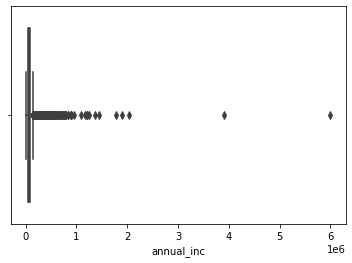

boxplot for  dti


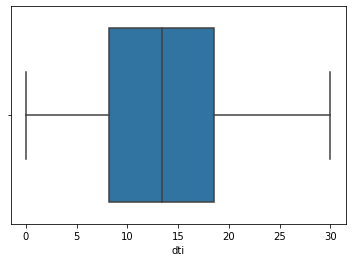

boxplot for  loan_amnt


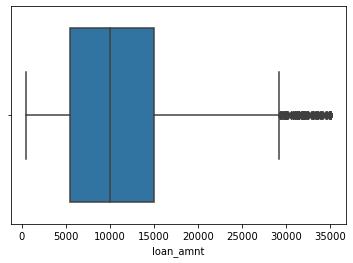

boxplot for  int_rate


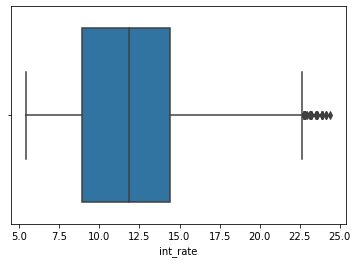

boxplot for  installment


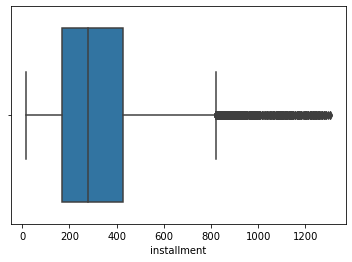

In [18]:
#boxplots
for i in num_cols:
    print("boxplot for ",i)
    sns.boxplot(x=loan_df[i])
    plt.show()
    
# based on the boxplots & summary metrics,we can indentify that there are some outlier in data for the columns :
#1) installments
#2) annual_inc (huge number of outliers)
#3) loan_amnt
#4) int_rate
#These outliers needs to be removed before univariate analysis. We will use the IQR (inter quartile range) method
#for outlier treatment. 


### Removing Outliers

In [16]:
#function to remove outliers via IQR method
def remove_outliers(df,cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

loan_df =remove_outliers(loan_df, num_cols)

boxplot for  annual_inc


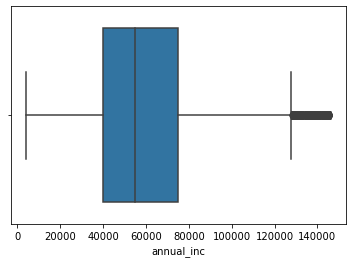

boxplot for  dti


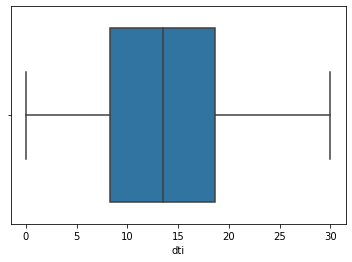

boxplot for  loan_amnt


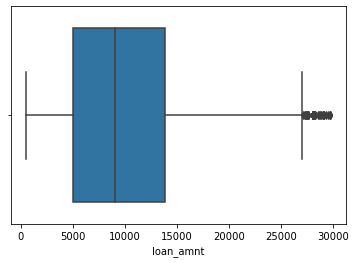

boxplot for  int_rate


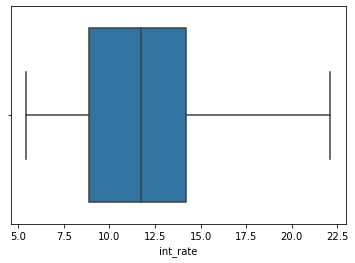

boxplot for  installment


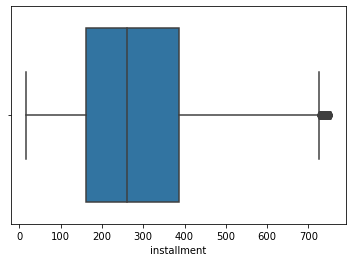

In [20]:
#boxplots for numerical columns after extreme values were removed from the dataset 
for i in num_cols:
    print("boxplot for ",i)
    sns.boxplot(x=loan_df[i])
    plt.show()

In [21]:
#analyising data distribution of columns after outlier treatment: 
loan_df[num_cols].describe()

,annual_inc,dti,loan_amnt,int_rate,installment
count,34018.000000,34018.000000,34018.000000,34018.000000,34018.000000
mean,60216.548411,13.414675,9851.009760,11.769091,287.401674
std,27450.223673,6.656550,5862.238975,3.577397,161.866586
min,4000.000000,0.000000,500.000000,5.420000,15.690000
25%,40000.000000,8.320000,5000.000000,8.900000,161.130000
50%,55000.000000,13.520000,9000.000000,11.710000,261.100000
75%,75000.000000,18.680000,13800.000000,14.220000,387.150000
max,146000.000000,29.990000,29700.000000,22.110000,752.870000


- There is a significant improvement in data distribution of most columns after removing the outliers. But we can see that for the annual income column, the difference between the 75 percentile & max value is still very high.
- So lets analyse the annual_inc column some more ..

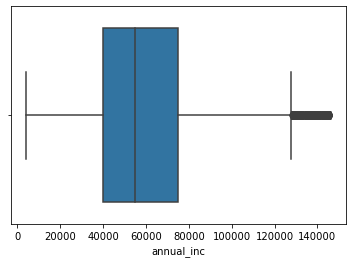

In [35]:
sns.boxplot(x=loan_df["annual_inc"])
plt.show()

In [22]:
#removing the values which are greater than the 99 percentile to eleminate extreme values
loan_df=loan_df[loan_df.annual_inc<=loan_df["annual_inc"].quantile(0.99)]

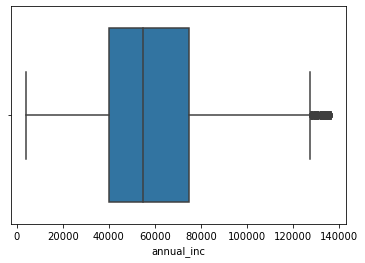

count     33677.000000
mean      59396.346134
std       26343.280186
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      136240.000000
Name: annual_inc, dtype: float64

In [23]:
sns.boxplot(x=loan_df["annual_inc"])
plt.show()
loan_df.annual_inc.describe()

### 7. DERIVED METRICS 

We will create categorical bins some of the numerical values to perform further analysis

In [17]:
def calculate_bins(income):
    if income <= 4000:
        return "very low"
    
    elif(income >= 4000) & (income < 26000):
        return "low"
    elif(income >=26000) & (income < 55000):
        return "average"
    elif(income >=55000) & (income < 75000):
        return "high"
    else:
        return "very high"
    
def calculate_bin_emi(emi):
    if emi < 16:
        return "low"
    elif (emi >=16) & (emi < 170):
        return "medium"
    elif (emi >=170) & (emi <390):
        return "high"
    elif (emi >390):
        return "very high"
    
def calculate_bin_intRate(rate):
    if rate < 5:
        return "low"
    elif (rate >=5) & (rate <9):
        return "medium"
    elif (rate >=9) & (rate <14):
        return "high"
    elif (rate >14):
        return "very high"
    

def calculate_bin_loan_amnt(amt):
    if (amt >= 500) & (amt < 5000):
        return "low"
    
    elif(amt >= 5000) & (amt < 9000):
        return "medium"
    elif(amt >=9000) & (amt < 14000):
        return "high"
    elif amt >14000:
        return "very high"

def calculate_bin_lti(lti):
    if (lti >0) & (lti <= 10.0):
        return 'low'
    elif (lti >10.0) &( lti <= 0.20):
        return 'medium'
    else:
        return 'high'  


def calculate_bins_dti(dti):
    if (dti < 10.00):
        return 'low'
    elif (dti >=10.00) & (dti < 20.00):
        return 'medium'
    elif (dti >=20):
        return "high"

    
loan_df['income_bin'] = loan_df['annual_inc'].apply(lambda x : calculate_bins(x) )
loan_df['emi_bin'] = loan_df['installment'].apply(lambda x : calculate_bin_emi(x) )
loan_df['dti_bin'] = loan_df['dti'].apply(lambda x : calculate_bins_dti(x) )
loan_df['loan_Amnt_bin'] = loan_df['loan_amnt'].apply(lambda x : calculate_bin_loan_amnt(x) )
loan_df['interestRate_bin'] = loan_df['int_rate'].apply(lambda x : calculate_bin_intRate(x) )

#more derived metrics 
#loan to income ratio -> HIgher the ratio , more chances of defaulting.
loan_df["loan_income_ratio"] = round(100*(loan_df.loan_amnt/loan_df.annual_inc),2)
loan_df['lti_bin'] = loan_df['loan_income_ratio'].apply(lambda x : calculate_bin_lti(x) ) 


#### We can now begin EDA in the following order: 

1. Univariate - numerical variables
2. Univariate -  categorical variables
3. Segmented univariate analysis
4. Bivariate analysis 
5. Multivariate analysis

#### But before strating the EDA, lets understand our target variable

In [25]:
loan_df.loan_status.value_counts()

#Charged off loans are the defaulted loans and we need to focus our analysis on indentifying factors 
#that lead to defaulting

Fully Paid     28878
Charged Off     4799
Name: loan_status, dtype: int64

In [18]:
defaulters_data=loan_df[loan_df.loan_status=="Charged Off"]
fullypaid_data=loan_df[loan_df.loan_status=="Fully Paid"]

In [19]:
##user defined method to visualize categorical data with under 5 segments
def univariate_categorical(df,col):
    ncount = len(df)
    plt.figure(figsize=(8,4))
    ax=sns.countplot(x=loan_df[col],data=df)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title('Overall distribution of {0} '.format(col),fontsize=12)
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), ha='center', va='bottom') # set the alignment of the text
    plt.show()

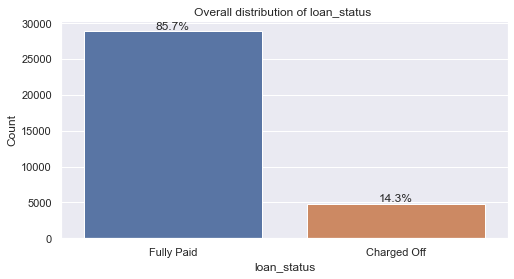

In [188]:
univariate_categorical(loan_df,"loan_status")

Insight :

Loan status : Most loans were fully paid compared to the charged off/defaulted ones

## Univariate Analysis

### 1. Univariate - Numerical variables

In [43]:
#Some user defined methods for repeatative tasks: 

In [20]:
#method for generating plots for numerical variables to analyse trends in data
def univariate_numerical(col):   
        print("Summary mertics & Distribution plots for  : ",col)       
        fig, p = plt.subplots(1,2, figsize=(16, 4))
        sns.histplot(x=loan_df[col],ax=p[0])
        sns.boxplot(x=loan_df[col],ax=p[1])
        p[0].set_xlabel(col)
        plt.show()
        print("\n",loan_df[col].describe())

In [98]:
print(num_cols)

['annual_inc', 'dti', 'loan_amnt', 'int_rate', 'installment']


Summary mertics & Distribution plots for  :  annual_inc


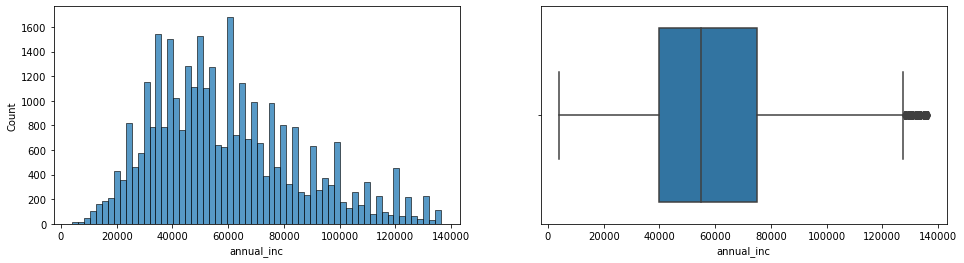


 count     33657.000000
mean      59391.663510
std       26348.949915
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      136374.000000
Name: annual_inc, dtype: float64


In [83]:
univariate_numerical("annual_inc")

Insight: 

- Majority of borrowers have an Annual income in the ranges of under 60K. This suggests lower income groups opting for loan more often. 
- There are also some extreme cases of applicants with very high income requesting for a loan

Summary mertics & Distribution plots for  :  dti


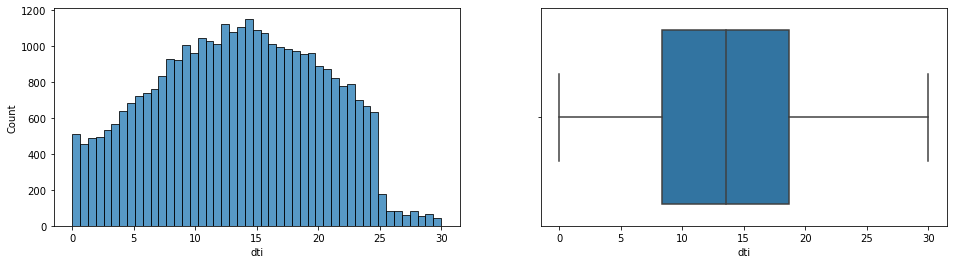


 count    33657.000000
mean        13.431303
std          6.658722
min          0.000000
25%          8.330000
50%         13.540000
75%         18.700000
max         29.990000
Name: dti, dtype: float64


In [85]:
univariate_numerical("dti")

Insights: 

- Debt to income ratio is crowded at 10-15% for most borrowers and follows a normal distribution. 

Summary mertics & Distribution plots for  :  loan_amnt


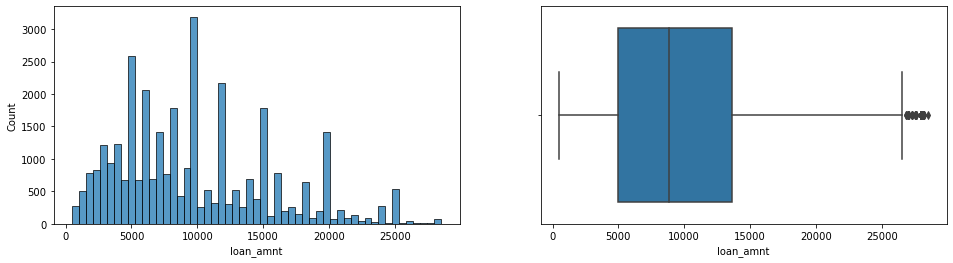


 count    33657.000000
mean      9805.724664
std       5826.853567
min        500.000000
25%       5000.000000
50%       8875.000000
75%      13650.000000
max      28500.000000
Name: loan_amnt, dtype: float64


In [84]:
univariate_numerical("loan_amnt")

Insights: 

- Loan amount : Mostly loans are requested in the ranges of 5k to 10k ,with peaks at 5k and 10k 
- Loan over 25K are rare

Summary mertics & Distribution plots for  :  int_rate


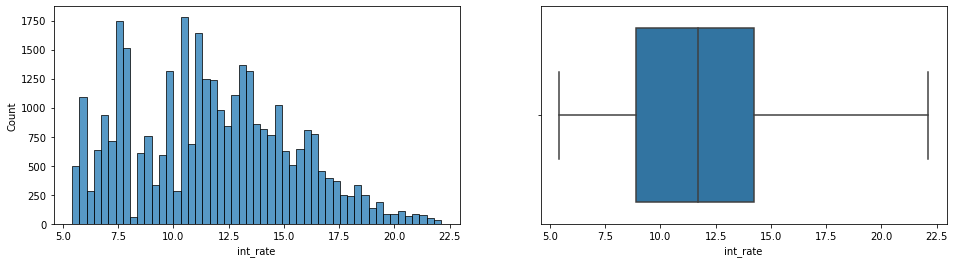


 count    33657.000000
mean        11.766603
std          3.574104
min          5.420000
25%          8.900000
50%         11.710000
75%         14.220000
max         22.110000
Name: int_rate, dtype: float64


In [86]:
univariate_numerical("int_rate")

In [67]:
defaulters_data.int_rate.describe()

count    4794.000000
mean       13.598388
std         3.502744
min         5.420000
25%        11.120000
50%        13.490000
75%        16.020000
max        22.110000
Name: int_rate, dtype: float64

In [116]:
loan_df.int_rate.mode()

0    10.99
Name: int_rate, dtype: float64

Insights:

-  Around 11% is the most popular rate of interest for loans for most borrowers
- Number of loans with an interest rate higher than 16% sees a downward trend on the overall data.


Summary mertics & Distribution plots for  :  installment


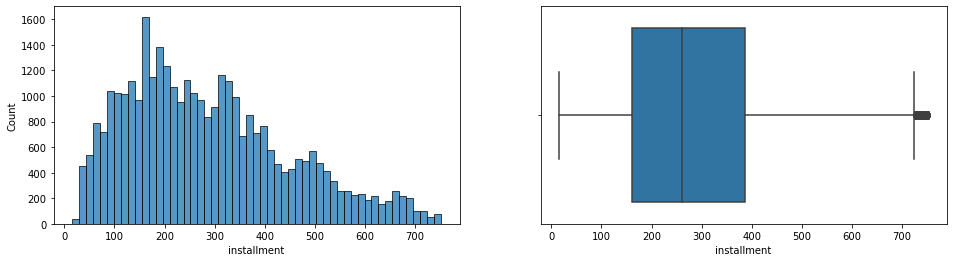


 count    33657.000000
mean       286.298271
std        161.232326
min         15.690000
25%        160.730000
50%        260.290000
75%        386.250000
max        751.640000
Name: installment, dtype: float64


In [87]:
univariate_numerical("installment")

Insights: 

- Installment : Most borrowers opt for a less EMI (within n the ranges of 150 to 250)

### 2 . Univariate -Categorical variables

In [ ]:
#user defined methods: 

In [21]:
#method for plotting variables with multiple categories 
def univariate_categorical_multi(col):
    title="Distribution of "+col
    plt.title(title,fontsize=12)
    # setting the figure size
    width = 20
    height = 10
    sns.set(rc = {'figure.figsize':(width,height)})
    sns.countplot(x=loan_df[col])
    plt.xlabel(col)
    plt.ylabel("count")
    plt.xticks(rotation=90)
    plt.show()
    

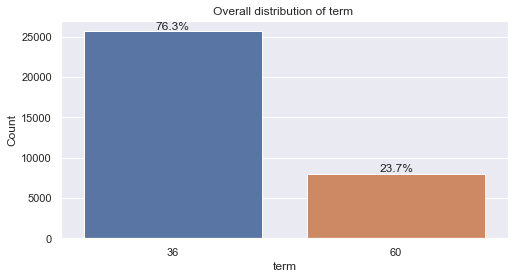

In [189]:
#term
univariate_categorical(loan_df,"term")

Insight : 
- Term: 36 month term period is the more popular option among borrowers

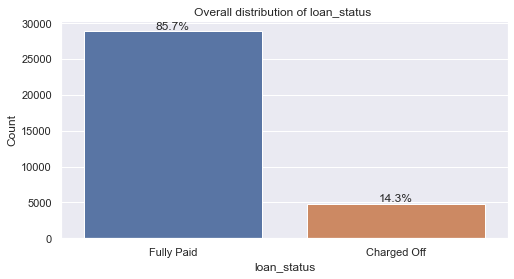

In [190]:
#loan status
univariate_categorical(loan_df,"loan_status")

Insight : 

- Loan status : Most loans were fully paid compared to the charged off/defaulted ones
 

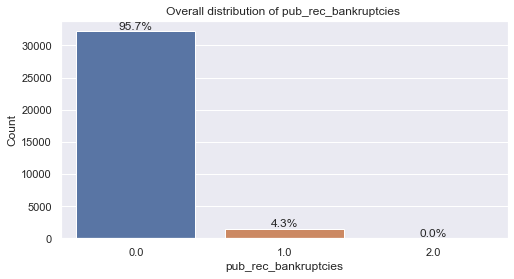

In [191]:
#public record of bankruptcies
univariate_categorical(loan_df,"pub_rec_bankruptcies")

- Overall, a lesser number of bankruptcies were recorded among the loan applicants


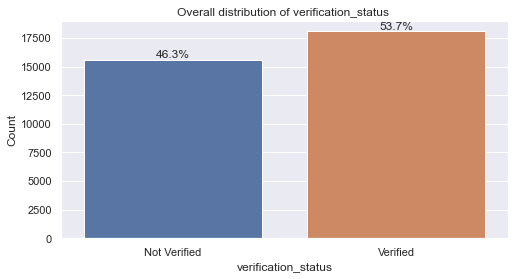

In [192]:
#verification
univariate_categorical(loan_df,"verification_status")

- Over 50% of the applications had a verified source of income 

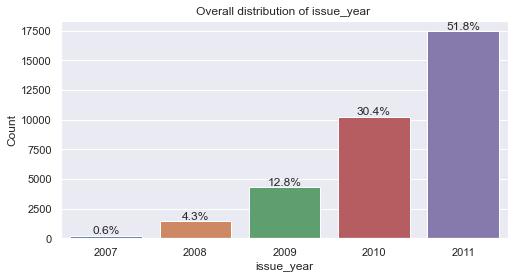

In [193]:
#issue_year
univariate_categorical(loan_df,"issue_year")

#### - The number of loans being issued by the company have been increasing drastically over the years


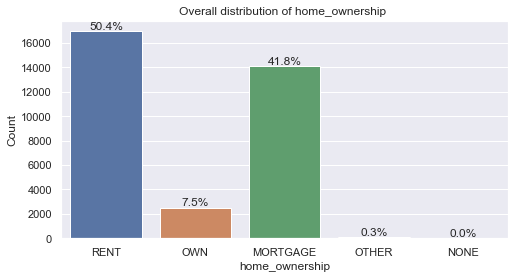

In [194]:
#home_ownership
univariate_categorical(loan_df,"home_ownership")

- Majority of borrowers either have rented homes or have a mortgage


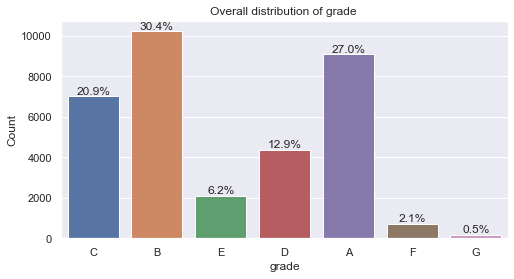

In [195]:
#grade
univariate_categorical(loan_df,"grade")

- Loans classifying as Grade A and B are more in number. The approval based on loan grading seems accurate.

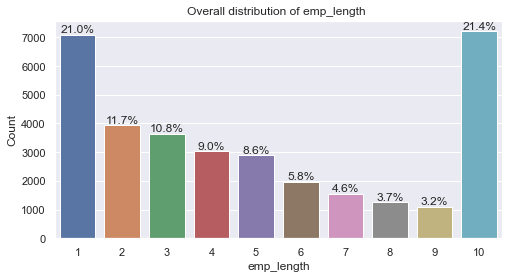

In [196]:
#emp_length
univariate_categorical(loan_df,"emp_length")

- Interestingly, most frequent borrowers either have 1 year/less than 1 year of work experience or have over 10 years of experience

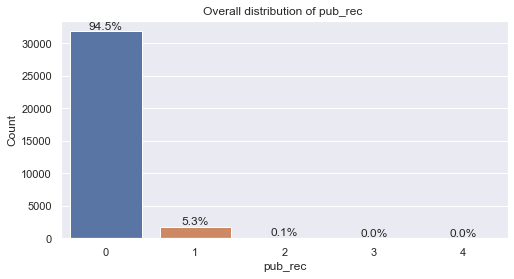

In [197]:
#pub_rec
univariate_categorical(loan_df,"pub_rec")

- Majority of borrowers had no derogatory public records

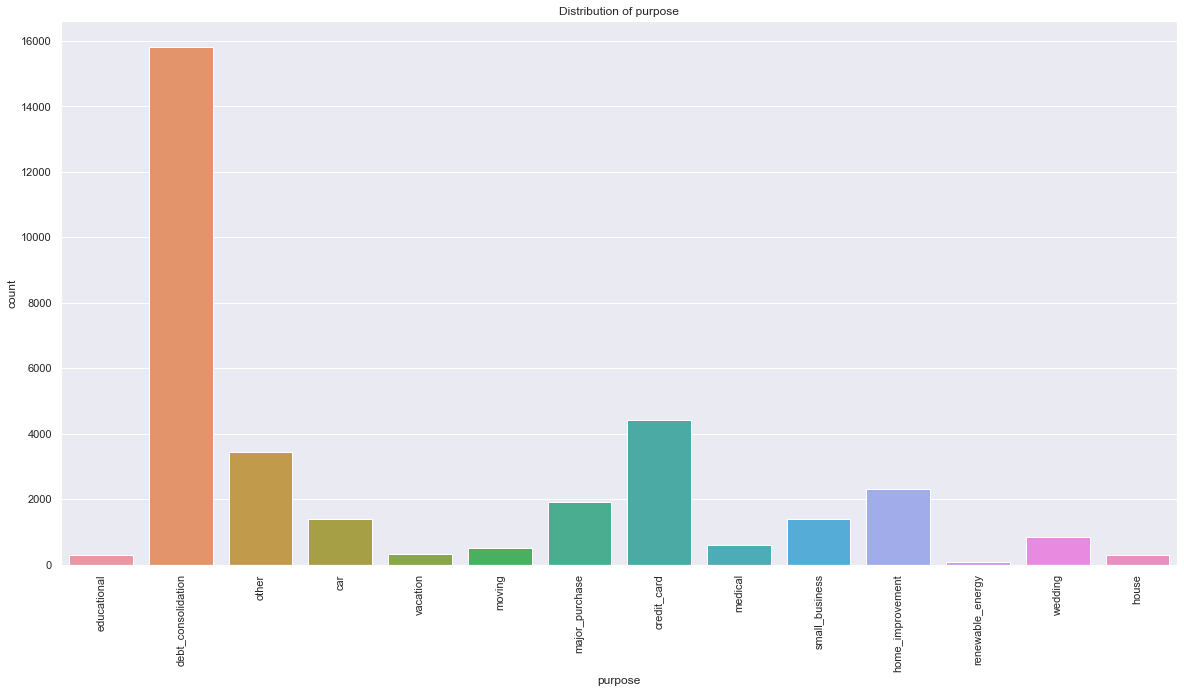

In [200]:
#Purpose of loan
univariate_categorical_multi("purpose")


- debt consolidation is the number 1 reason stated by borrowers as the purpose of loan
- Credit card payment ranks 2nd in the purpose list



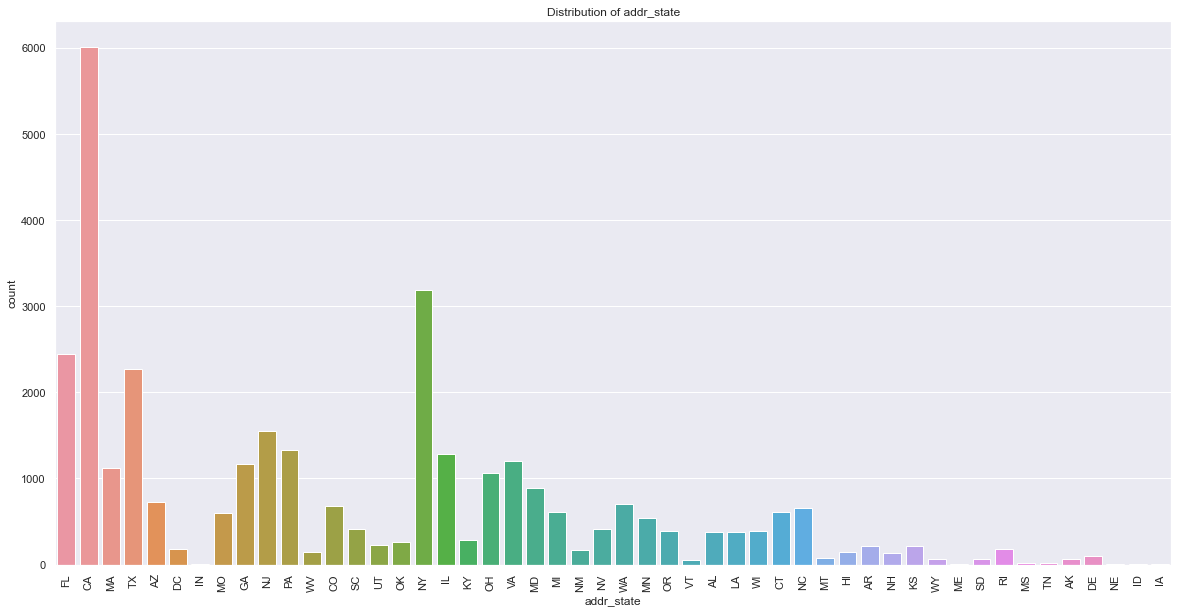

In [201]:
# address state of the borrower
univariate_categorical_multi("addr_state")

- Highest numbers of borrowers are from urban states like CA followed by,NY,FL and TX 

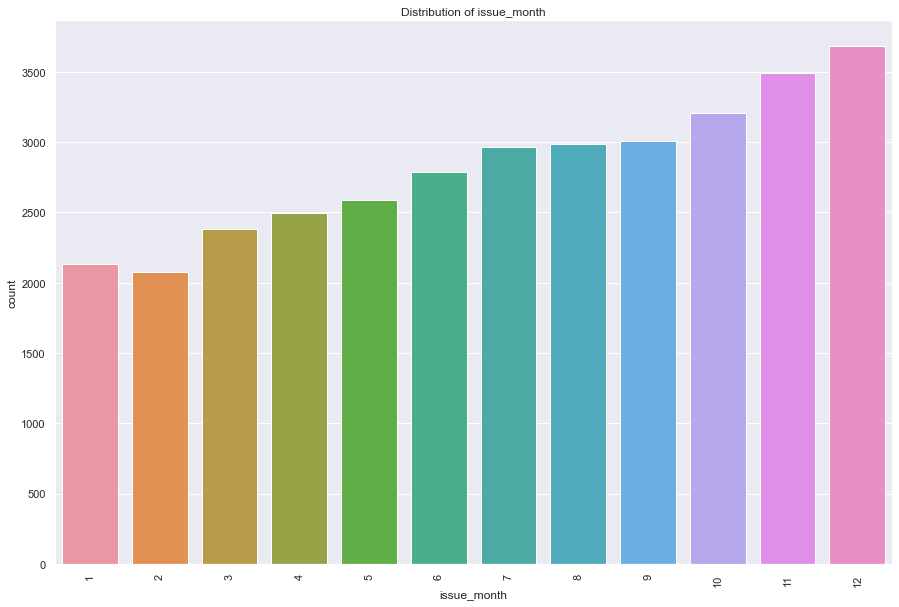

In [180]:
# loan issue month
univariate_categorical("issue_month")

- Most loans were issued in the last quarter of any year

### 3. Segmented univariate analysis 

#### 3.1 Categorical variables

We want to further analyse the categorical variables by performing segmented univariate analysis.
- Here we will compare how the loan status varies across different segments of the categorical values .

In [22]:
# method to plot graphs for segmeneted univariate analysis among categorical variables
def segmented_univariate(col,comparison_hue):
    ncount = len(loan_df)
    plt.figure(figsize=(8,4))
    ax=sns.countplot(x=loan_df[col],data=loan_df,hue=comparison_hue)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title('{1} across different segments of {0}'.format(col,comparison_hue),fontsize=12)
#     for p in ax.patches:
#         x=p.get_bbox().get_points()[:,0]
#         y=p.get_bbox().get_points()[1,1]
#         ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), ha='center', va='bottom') # set the alignment of the text
    plt.show()

In [23]:
#user defined method to visualize segmented univariate for derived metrics
def seg_univariate2(col,df1,df2):
    print("Segmented univariate analysis on : ",col)       
    fig, p = plt.subplots(1,2, figsize=(16, 4))
    sns.histplot(x=df1[col],ax=p[0])
    sns.histplot(x=df2[col],ax=p[1])
    p[0].set_xlabel(col+" distribution for Defaulters")
    p[1].set_xlabel(col+" distribution for Non defaulters")       
    plt.show()
    print("\n For defaulters: ",df1[col].describe())
    print("\n For fully paid : " ,df2[col].describe())

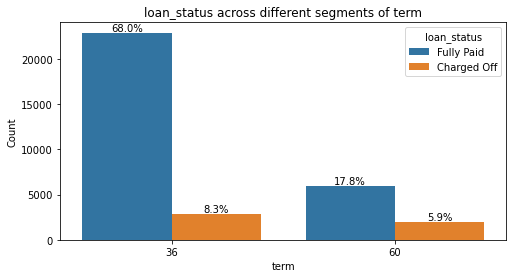

In [117]:
#loan_status across different terms
segmented_univariate("term","loan_status")

Insights:

- Around 25% of borrowers who opted for 60 months term ,defaulted.Whereas a much lesser % defaulted from the 36    months category
- ##### This indicates that a 60 month loan tenure is riskier than 36 months

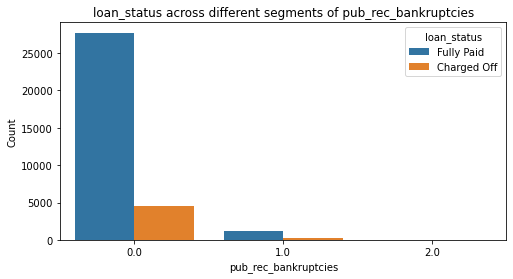

In [73]:
#loan_status across different bankruptcy status
segmented_univariate("pub_rec_bankruptcies","loan_status")

Public bankruptcies may not be a good indicator of deciding whether the loan will default or not

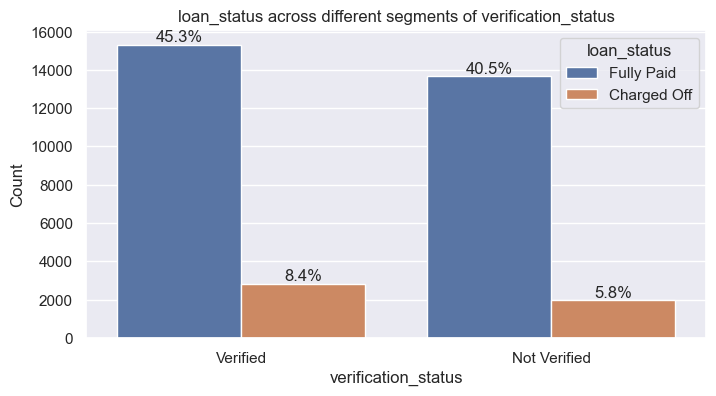

In [333]:
#loan_status across different income verification status
segmented_univariate("verification_status","loan_status")

Insights:

- ##### Unexpectedly, borrowers with income source as "verified" defaulted more compared to the ones without verification

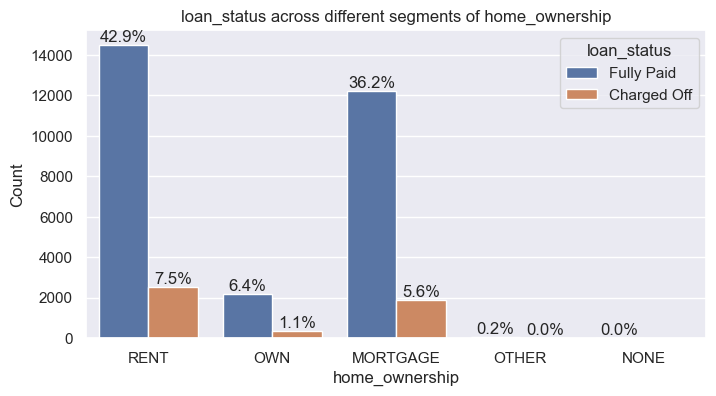

In [335]:
#loan_status across different home ownerships
segmented_univariate("home_ownership","loan_status")

Insights: 

- ##### Borrowers who either have rented accomodation or have a mortgage collectively had higher default rates 

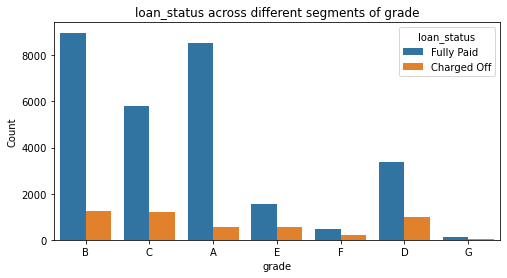

In [123]:
#loan_status across different grades
segmented_univariate("grade","loan_status")

Insights:

- #####  Grades B C and D had higher chances of defaulting.  
- Grade A had a comparitively lower default rate even though, it had significantly high number of loans 

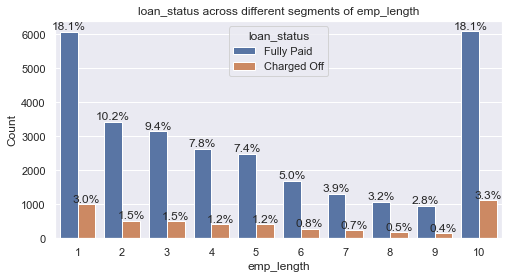

In [203]:
segmented_univariate("emp_length","loan_status")

Insights:

- Applicants/Borrowers with 10+ years of experience are likely to default most
- Similar trend is seem for applicants with 1 or less than 1 year of experience

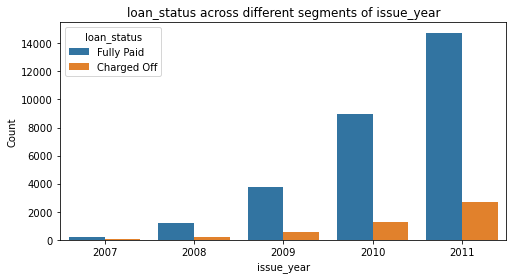

In [124]:
#loan_status across different loan issue year
segmented_univariate("issue_year","loan_status")

Insight:
- ##### 2011 saw the highest number of defaulters as well as highest number of approved loans

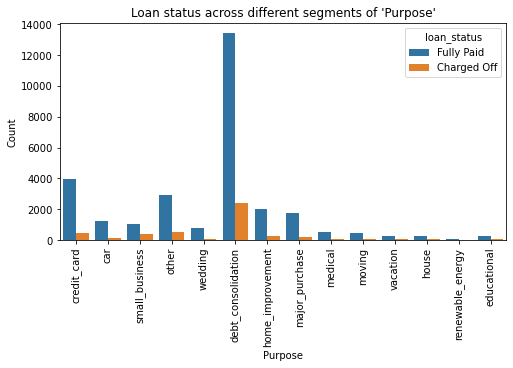

In [126]:
#loan_status across different purpose 
plt.figure(figsize=(8,4))
sns.countplot(x=loan_df.purpose,data=loan_df,hue="loan_status")
plt.xlabel("Purpose")
plt.ylabel('Count')
plt.title("Loan status across different segments of 'Purpose'",fontsize=12)
plt.xticks(rotation=90)
plt.show()

Insights:
- Highest defualts are for the categories "Debt consolidation" & "Credit card" followed by "small business" and "home improvement"

In [79]:
# Top purpose found for defaulters:
defaulters_data.purpose.value_counts()

debt_consolidation    2372
other                  543
credit_card            451
small_business         375
home_improvement       280
major_purchase         197
car                    152
medical                 96
wedding                 83
moving                  82
vacation                49
house                   49
educational             49
renewable_energy        16
Name: purpose, dtype: int64

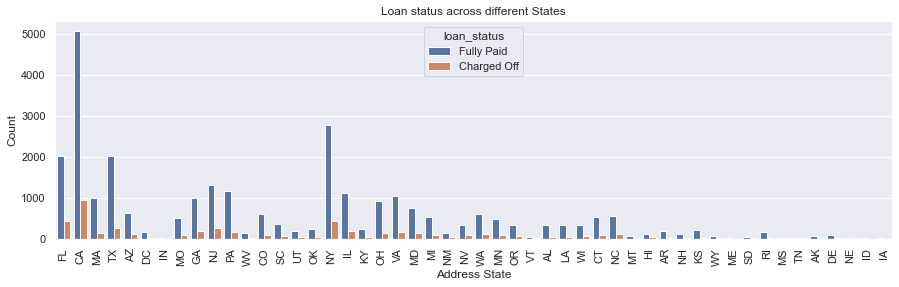

In [206]:
#loan_status across different states
plt.figure(figsize=(15,4))
sns.countplot(x=loan_df.addr_state,data=loan_df,hue="loan_status")
plt.xlabel("Address State")
plt.ylabel('Count')
plt.title("Loan status across different States",fontsize=12)
plt.xticks(rotation=90)
plt.show()

Insights: 
- ##### CA state had the highest number of defaults
-This was followed by FL and NY

### 3.2 Segmented univariate- derived metrics

Segmented univariate analysis on :  annual_inc


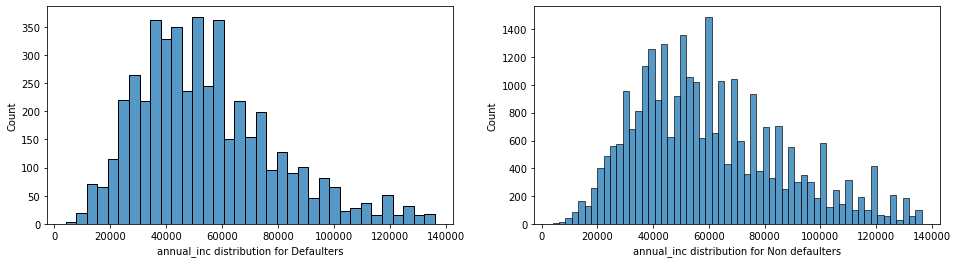


 For defaulters:  count      4794.000000
mean      54527.078264
std       24707.142641
min        4080.000000
25%       36000.000000
50%       50000.000000
75%       68003.000000
max      135996.000000
Name: annual_inc, dtype: float64

 For fully paid :  count     28863.000000
mean      60199.646799
std       26525.988884
min        4000.000000
25%       40000.000000
50%       55200.000000
75%       75600.000000
max      136374.000000
Name: annual_inc, dtype: float64


In [76]:
seg_univariate2("annual_inc",defaulters_data,fullypaid_data)

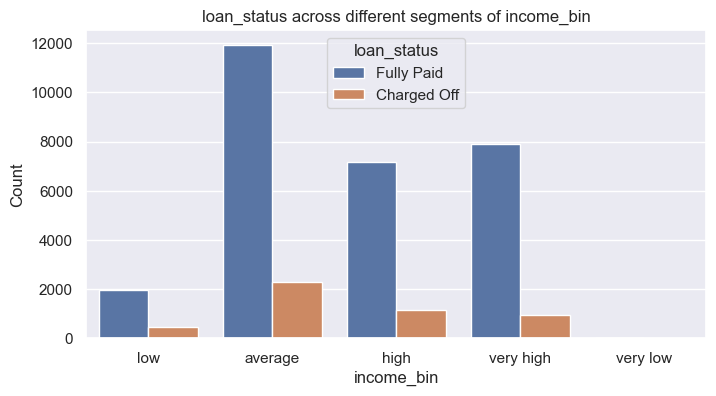

In [358]:
segmented_univariate("income_bin","loan_status")

Insights: 

-  loans are mostly taken by individuals whose income is under 60K 
-  #### Most Defaulters have an income in the range of 35k to 55k

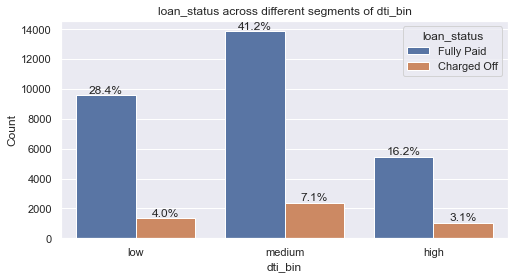

In [207]:
#dti
segmented_univariate("dti_bin","loan_status")

Insights: 

- The borrowers who had debt to income ratio in the range of 10-20% had hightest defaults

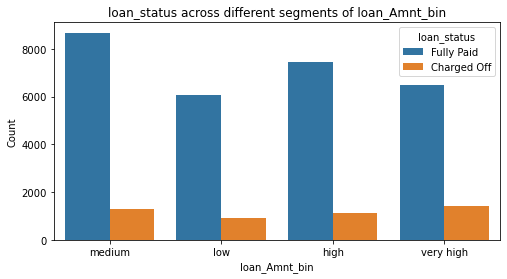

In [25]:
#loan_status across different income verification status
segmented_univariate("loan_Amnt_bin","loan_status")

Insights: 
Loan defaults are higher where loan amount is high

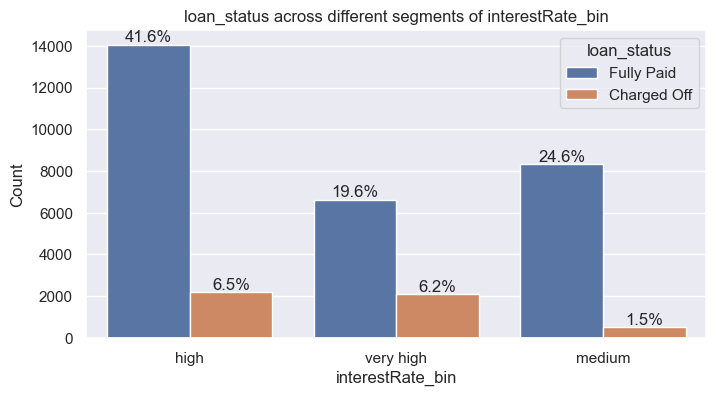

In [350]:
#int_rate
segmented_univariate("interestRate_bin","loan_status")

Segmented univariate analysis on :  int_rate


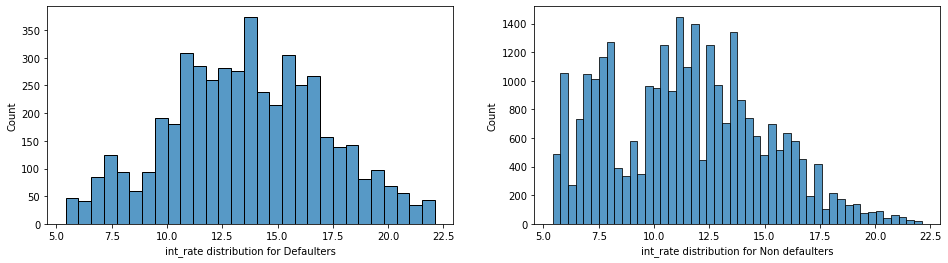


 For defaulters:  count    4794.000000
mean       13.598388
std         3.502744
min         5.420000
25%        11.120000
50%        13.490000
75%        16.020000
max        22.110000
Name: int_rate, dtype: float64

 For fully paid :  count    28863.000000
mean        11.462353
std          3.494083
min          5.420000
25%          8.490000
50%         11.360000
75%         13.850000
max         22.110000
Name: int_rate, dtype: float64


In [77]:
seg_univariate2("int_rate",defaulters_data,fullypaid_data)

Insights: 

- Loans with high rate of interest,upto 16% led to more number of defaults.
- ##### Most defaulters had loans with 13.5% interest rate
- ##### Defaulters were prone to take loans with higher interest rate

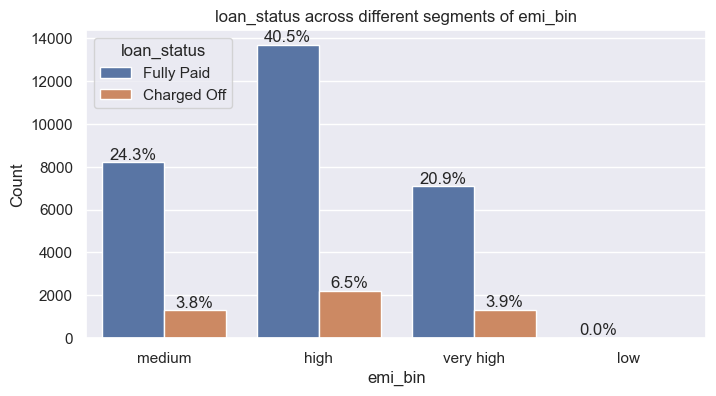

In [351]:
#installment
segmented_univariate("emi_bin","loan_status")

Insights: 

- ##### Most Borrowers chose to pay high EMIs and also saw a higher chances of defaulting

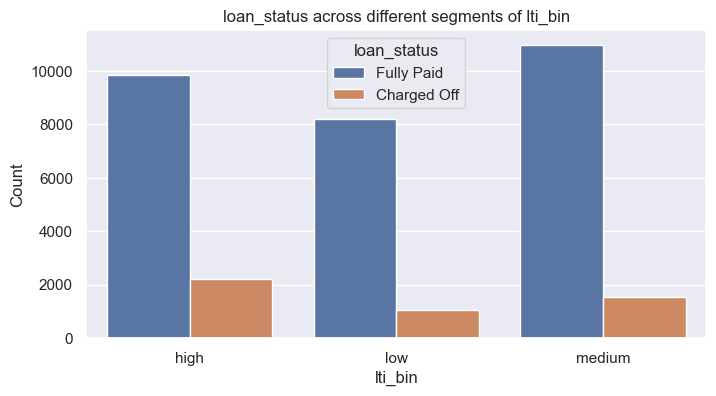

In [359]:
#loan to income ratio
segmented_univariate("lti_bin","loan_status")

#higher the ratio, higher the chances of defaulting

Summary mertics & Distribution plots for :  loan_income_ratio


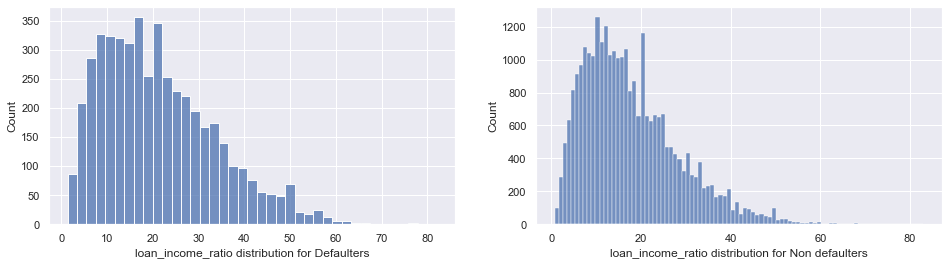


 For defaulters:  count    4794.000000
mean       21.290156
std        12.530209
min         1.330000
25%        11.430000
50%        19.225000
75%        28.990000
max        81.970000
Name: loan_income_ratio, dtype: float64

 For fully paid :  count    28863.000000
mean        17.761542
std         10.686749
min          0.740000
25%          9.720000
50%         15.720000
75%         23.810000
max         83.000000
Name: loan_income_ratio, dtype: float64


In [211]:
univariate_numerical_2("loan_income_ratio",defaulters_data,fullypaid_data)

Insights :

- ##### Borrowers with high loan to income ratio tend to default more

### 4. Bivariate Analysis

#### 4.1  Numerical vs Numerical 


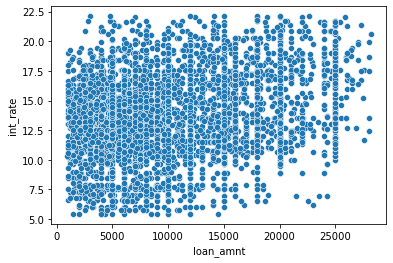

In [145]:
#Loan Amount vs Interest Rate for defaulters
sns.scatterplot(x=defaulters_data["loan_amnt"],y=defaulters_data["int_rate"])
plt.show()

Insights:
- The scatter plot of loan amount vs interest rate  among defaulters suggests higher the loan amount, higher will be the interest rate.


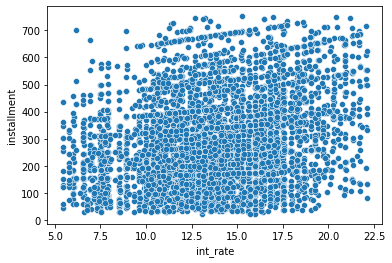

In [150]:
# Interest rate vs Installment for defaulters
sns.scatterplot(x=defaulters_data["int_rate"],y=defaulters_data["installment"])
plt.show()

Insights: 
- The scatter plot of interest rate vs installment among defaulters suggests that loans with higher interest rate have higher EMIs 


### 4. 2. Numerical vs  Categorical 

In [31]:
#user defined method to visualize bivariate analysis between numerical & categorical variables
def cat_num_plot(cat_col,num1,num2,num3,df):
    plt.figure(figsize=(20,5))
    plt.subplot(131)
    sns.barplot(x=cat_col, y=num1, hue='loan_status', data=df,ci=None)
    plt.title('{0} vs {1}'.format(cat_col,num1))
    plt.subplot(132)
    sns.barplot(x=cat_col, y=num2, hue='loan_status', data=df,ci=None)
    plt.title('{0} vs {1}'.format(cat_col,num2))
    plt.subplot(133)
    sns.barplot(x=cat_col, y=num3, hue='loan_status', data=df,ci=None)
    plt.title('{0} vs {1}'.format(cat_col,num3))
    plt.show()

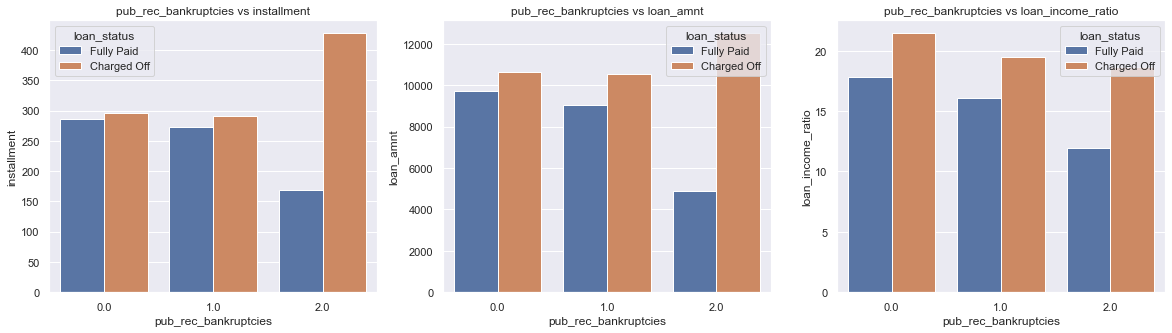

In [219]:
#1 pub_rec_bankruptcies vs [Loan amount,Installment,Loan to income ratio]

cat_num_plot("pub_rec_bankruptcies","installment","loan_amnt","loan_income_ratio",loan_df)

Insights: 

Having a non zero public recorded bankruptcies among borrowers is a clear indicator of default.

- These borrowers are paying higher installments(which inversely indicates high rate of interest of 14-16%)
- Are having a high loan to income ratio (payback capability is low)
- Are applying for a higher loan amount leading to defaults

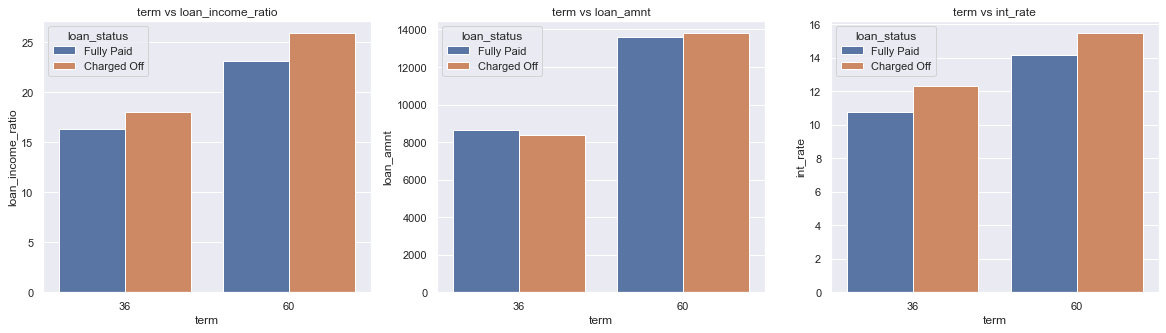

In [217]:
#2 Term vs [Loan amount,Interest Rate,Loan to income ratio]
cat_num_plot("term","loan_income_ratio","loan_amnt","int_rate",loan_df)

Insights: 

A loan with term 60 month is a clear indicator of default for borrowers who are :
- paying a high interest rate (around 14-16%)
- having a high loan to income ratio (payback capability is low)

A higher loan amount is again emerging as strong indicator of default

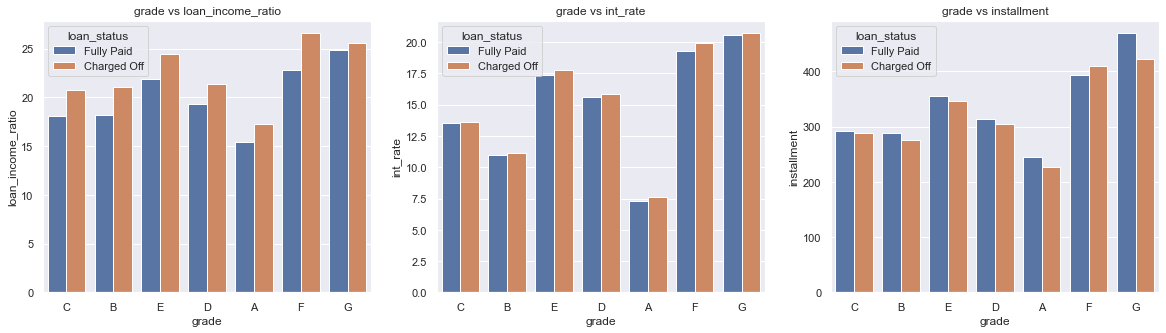

In [210]:
#3Grade vs [Interest Rate,Installment,Loan to income ratio]
cat_num_plot("grade","loan_income_ratio","int_rate","installment",loan_df)

Insights: 

A loan with lower grades like F and G are a clear indicator of default. Such borrowers 

- Are paying a higher interest rate (around 14-16%)
- Are paying a very high installments
- Are having a high loan to income ratio (payback capability is low)

## What we understood so far:

#### Univariate Numerical Analysis-

- Annual income : Majority of borrowers have an Annual income in the ranges of under 60K. This suggests lower income groups opting for loan more often.
- Annual income : There are also some extreme cases of applicants with very high income requesting for loan
- DTI - Debt to income ratio is crowded at 10-15% for most borrowers
- Loan amount : Mostly loans are requested in the ranges of 5k to 10k ,with peaks at 5k and 10k
- Loan over 25K are rare
- Rate of interest: 11% is the most popular rate of interest for most loans
- Number of loans with an interest rate higher than 16% sees a downward trend.
- Instalment : Borrowers tend to opt for a less EMI (within the ranges of 150 to 250)

#### Univariate Categorical Analysis -

1. Term: 36 month term period is the more popular option among borrowers
2. Loan status : Most loans were fully paid compared to the charged off/defaulted ones
3. Lesser number of bankruptcies were recorded among the loan applicants
5. Around 50% of the applications had a verified source of income
6. The number of loans being issued by the company have been increasing drastically over the years
7. Majority of borrowers either have rented homes or have a mortgage
8. Employees belonging to Grade A and B are more likely to borrow
9. Interestingly, most frequent borrowers either have 1 year/less than 1 year of work experience or have over 10 years of experience
10. Majority of borrowers had no derogatory public records
11. debt consolidation is the number 1 reason stated by borrowers as the purpose of loan followed by Credit card payment 
12. Highest numbers of borrowers are from urban states like CA followed by,NY,FL and TX
13. Most loans were issued in the last quarter of any year


#### Segmented univariate Analysis-

1. Around 25% of borrowers who opted for 60 months term ,defaulted.Whereas a much lesser % defaulted from the 36 months category. This indicates that a 60 month loan tenure is riskier than 36 months
2. Public bankruptcies may not be a good indicator of deciding whether the loan will default or not
3.  Unexpectedly, borrowers with income source as "verified" defaulted more compared to the ones without verification. This indicates that the verification procedure may have to be looked into
4. Borrowers who either have rented accommodation or have a mortgage collectively had higher default rates
5. Grades B C and D had higher chances of defaulting. Where as Grade A had a comparatively lower default rate even though, it had significantly high number of loans
6. Applicants/Borrowers with 10+ years of experience are likely to default most . Similar trend is true for applicants with 1 or less than 1 year of experience
7. Loans issued in 2011 saw the highest number of defaulters as well as highest number of approved loans
8. Highest defaults are for the categories "Debt consolidation" & "Credit card" followed by "small business" and "home improvement"
9. CA state had the highest number of defaults .This was followed by FL and NY
10. Loans are mostly taken by individuals whose income is between 25K & 55K and they are likely to default as well
11. The borrowers who had debt to income ratio in the range of 10-20% had highest defaults
12. Loans with high(9-14%) or very high rate(above 14%) of interest, led to more number of defaults
13. Most Borrowers choosing to pay high EMIs  saw a higher chances of defaulting
14. Borrowers with high loan to income ratio tend to default more

#### Bi variate Analysis
1. The scatter plot of loan amount vs interest rate  among defaulters suggests higher the loan amount, higher will be the interest rate.
2. The scatter plot of interest rate vs installment among defaulters suggests that loans with higher interest rate have higher EMIs 

3. Having a non zero public recorded bankruptcies among borrowers is a clear indicator of default.
  - These borrowers are paying higher installments(which inversely indicates high rate of interest of 14-16%)
  - Are having a high loan to income ratio (payback capability is low)
  - Are applying for a higher loan amount leading to defaults
 


4. A loan with term 60 month is a clear indicator of default for borrowers who are :
  - paying a high interest rate (around 14-16%)
  - having a high loan to income ratio (payback capability is low)
  - A higher loan amount is again emerging as strong indicator of default
  
  
5. A loan with lower grades like F and G are a clear indicator of default. Such borrowers
  - Are paying a higher interest rate (around 14-16%)
  - Are paying a very high installments
  - Are having a high loan to income ratio (payback capability is low)
  

## 5. Multivariate Analysis

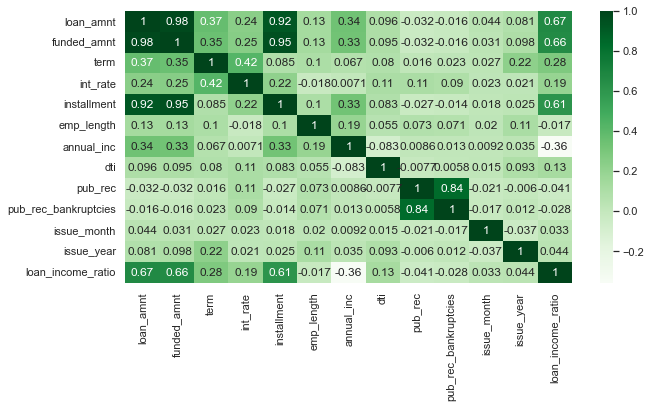

In [220]:
plt.figure(figsize=(10,5)) 
sns.heatmap(loan_df.corr(),cmap='Greens',annot=True) 
plt.show()

### Correlation insights -

Highly postive correlations
- Loan amount & funded amount are highly correlated
- EMI and loan amount are highly correlated. Higher the loan amount, higher will be EMI
- Higher the number of Public recorded bankruptcies,higher will be the mumber of derogatory public records

Medium +ve correlation-
- loan-income-ratio and loan amount.
- term and interest rate, indicating interest rate increases with longer terms

Negative correlations-
- Public rec bankruptcipes and loan amount, which makes sense as there are less chances of loan being approved if there are more number of derogatory records/bankruptcies
- Annual income and loan-income-ratio are also negatively correlated suggesting that a high lti ratio indicates a lower income and therefore a risky application

### Summarizing Indicators of Loan Default:

#### Defaulters list -

##### Risky Consumer attributes :

- Annual income :  Annual income in the ranges of 35k to 60k see higher defaults.
- Loan to income ratio : Borrowers with high loan to income ratio tend to default more as payback power is less
- Home ownership : Borrowers who either have rented accommodation or have a mortgage collectively had higher default rates
- State: Borrowers from large urban states are prone to defaulting 
- Public recorded bankruptcies : Having a non-zero public recorded bankruptcies is a strong indicator of default

##### Risky Loan attributes:
- Loan amount : Higher the loan amount, higher the chances of default.
- Rate of interest: Interest rate of 13.5% and above lead to higher defaults.
- Term:  A 60-month loan tenure is riskier than 36 months.
- EMI: Higher EMIs lead to higher chances of defaulting
- Verification Status : Unexpectedly, borrowers with income source as "verified" defaulted more compared to the ones without verification. This indicates that the verification procedure followed by the company may not be accurate
- Grade: Loan Grades F & G are good indicators of identifying defaults.
